In [22]:
#functional model 
import tensorflow as tf
from tensorflow.keras.layers import Input,Conv2D,Dense,Dropout,Flatten,MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model

In [2]:
data=tf.keras.datasets.fashion_mnist

(x_train,y_train),(x_test,y_test)= data.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
print(x_train.shape,x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_count= len(set(y_train))

In [5]:
class_count

10

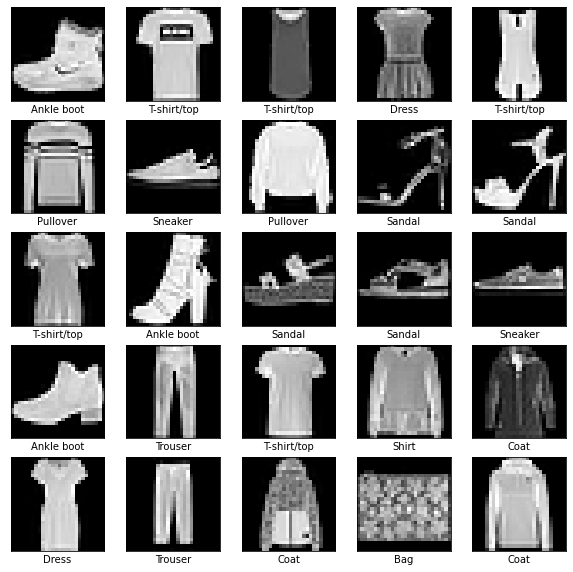

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]]) 
 
plt.show()

In [8]:
x_train[1].shape   # images wxhxc # channels = 1

(28, 28)

In [9]:
x_train=np.expand_dims(x_train,-1) 
x_test=np.expand_dims(x_test,-1)
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [21]:
i=Input(shape=(x_train[0].shape)) 

x=Conv2D(32,(3,3),padding='same',activation='relu')(i)   # (i) as input  , kernals/filters
x=MaxPooling2D()(x)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)

x=Conv2D(128,(3,3),strides=2,activation='relu')(x)


x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(class_count,activation='softmax')(x)


model=Model(i,x) #functional model 

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 conv2d_12 (Conv2D)          (None, 6, 6, 128)         73856     
                                                                 
 flatten_3 (Flatten)         (None, 4608)              0         
                                                                 
 dropout_6 (Dropout)         (None, 4608)              0         
                                                                 
 dense_7 (Dense)             (None, 512)               2359

In [15]:
hist=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,verbose=1)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.5163 - accuracy: 0.8087 - val_loss: 0.3914 - val_accuracy: 0.8534
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3593 - accuracy: 0.8649 - val_loss: 0.3335 - val_accuracy: 0.8761
Epoch 3/10
1023/1875 [===============>..............] - ETA: 8s - loss: 0.3073 - accuracy: 0.8839

KeyboardInterrupt: ignored

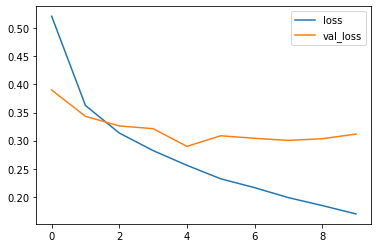

In [ ]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val_loss')
plt.legend()

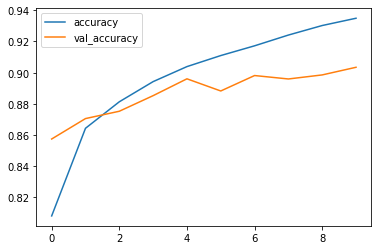

In [ ]:
plt.plot(hist.history['accuracy'],label='accuracy')
plt.plot(hist.history['val_accuracy'],label='val_accuracy')
plt.legend()

313/313 [==============================] - 2s 5ms/step


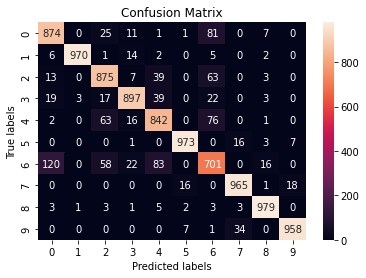

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm,annot=True,fmt='g',ax=ax)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


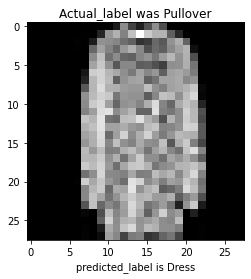

In [ ]:
i=np.random.choice(np.where(y_test!=y_pred)[0])


plt.imshow(x_test[i].reshape(28,28),cmap='gray')
plt.title('Actual_label was '+str(class_names[y_test[i]]))
plt.xlabel('predicted_label is ' + str(class_names[y_pred[i]]))
plt.show();

In [23]:
for x in range(10):
  print(x)

0
1
2
3
4
5
6
7
8
9


In [24]:
range(10)

range(0, 10)

In [ ]:
# on the go - data generation

In [38]:
def my_gen(num_): 
  t_ret=0
  while(t_ret<num_):
    # print(t_ret)
    t_ret=t_ret+1
    yield t_ret-1


In [40]:
# 200 GB images 

In [41]:
60000/200

300.0

In [ ]:
300 steps per epoch # to traverse your data once